In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from statsmodels.stats.anova import AnovaRM
import numpy as np

In [2]:
id_information_S1 = pickle.load(open('id_information_S1_file', 'rb'))
id_information_S2 = pickle.load(open('id_information_S2_file', 'rb'))
print(id_information_S1)
print('\n', id_information_S2)

   Participant ID                Emotional sequence Sequence  \
0            C001  [Baseline, Fear, Happy, Neutral]      FHN   
1            C002  [Baseline, Fear, Neutral, Happy]      FNH   
2            C003  [Baseline, Fear, Neutral, Happy]      FNH   
3            C004  [Baseline, Happy, Fear, Neutral]      HFN   
4            C005  [Baseline, Happy, Neutral, Fear]      HNF   
5            C006  [Baseline, Happy, Neutral, Fear]      HNF   
6            C007  [Baseline, Happy, Fear, Neutral]      HFN   
7            C008  [Baseline, Happy, Neutral, Fear]      HNF   
8            C009  [Baseline, Happy, Fear, Neutral]      HFN   
9            C010  [Baseline, Fear, Happy, Neutral]      FHN   
10           C011  [Baseline, Neutral, Fear, Happy]      NFH   
11           C012  [Baseline, Neutral, Happy, Fear]      NHF   
12           C013  [Baseline, Neutral, Happy, Fear]      NHF   
13           C014  [Baseline, Fear, Happy, Neutral]      FHN   
14           C015  [Baseline, Neutral, H

In [3]:
filepath_feat_S1='conditions_features_S1.xlsx'
filepath_feat_S2='conditions_features_S2.xlsx'
neutral_S1 = pd.read_excel(filepath_feat_S1,sheet_name='Neutral_S1',  usecols=lambda x: 'Unnamed' not in x)
neutral_S2 = pd.read_excel(filepath_feat_S2,sheet_name='Neutral_S2',  usecols=lambda x: 'Unnamed' not in x)
print(neutral_S1.head())
print('\n',neutral_S1.head())

   EMG_MF_Activations_N  EMG_MF_Duration_Mean  EMG_MF_Duration_Std  \
0                   426              0.104836             0.156322   
1                   472              0.102706             0.092404   
2                   434              0.107597             0.129523   
3                   463              0.081445             0.061379   
4                   508              0.090526             0.106354   

   EMG_MF_Duration_Var  EMG_MF_Duration_Skew  EMG_MF_Duration_Kurt  \
0             0.024437              0.649344             68.686478   
1             0.008538              1.029359             24.579094   
2             0.016776              0.639192            246.214836   
3             0.003767              0.706023            172.887975   
4             0.011311              0.720018             71.364168   

   EMG_MF_MaxPeakAct_Mean  EMG_MF_MaxPeakAct_Std  EMG_MF_MaxPeakAct_Var  \
0            13009.810869           71015.888576           5.043256e+09   
1       

(29, 180)


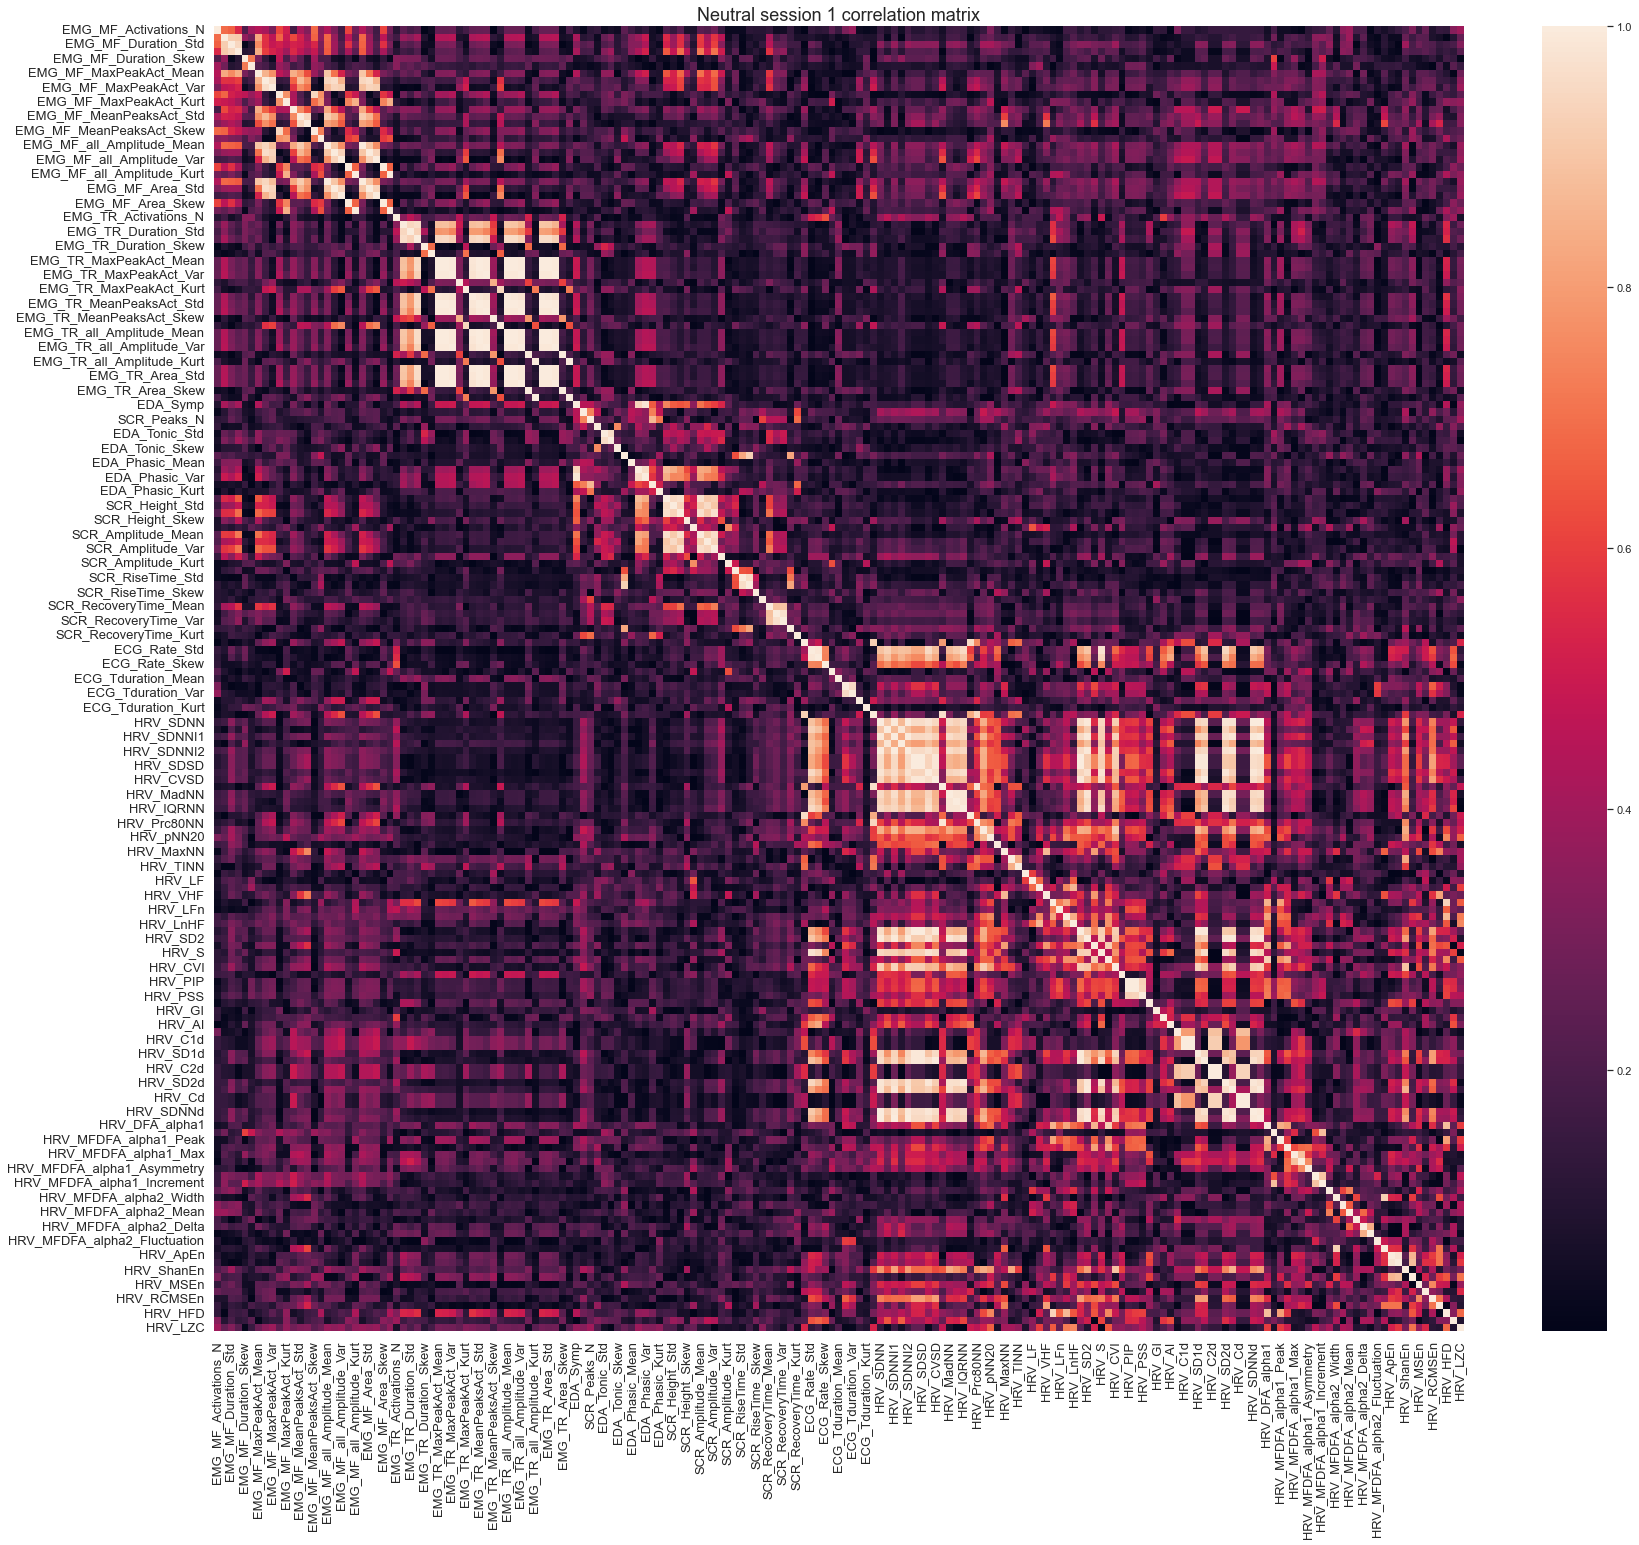

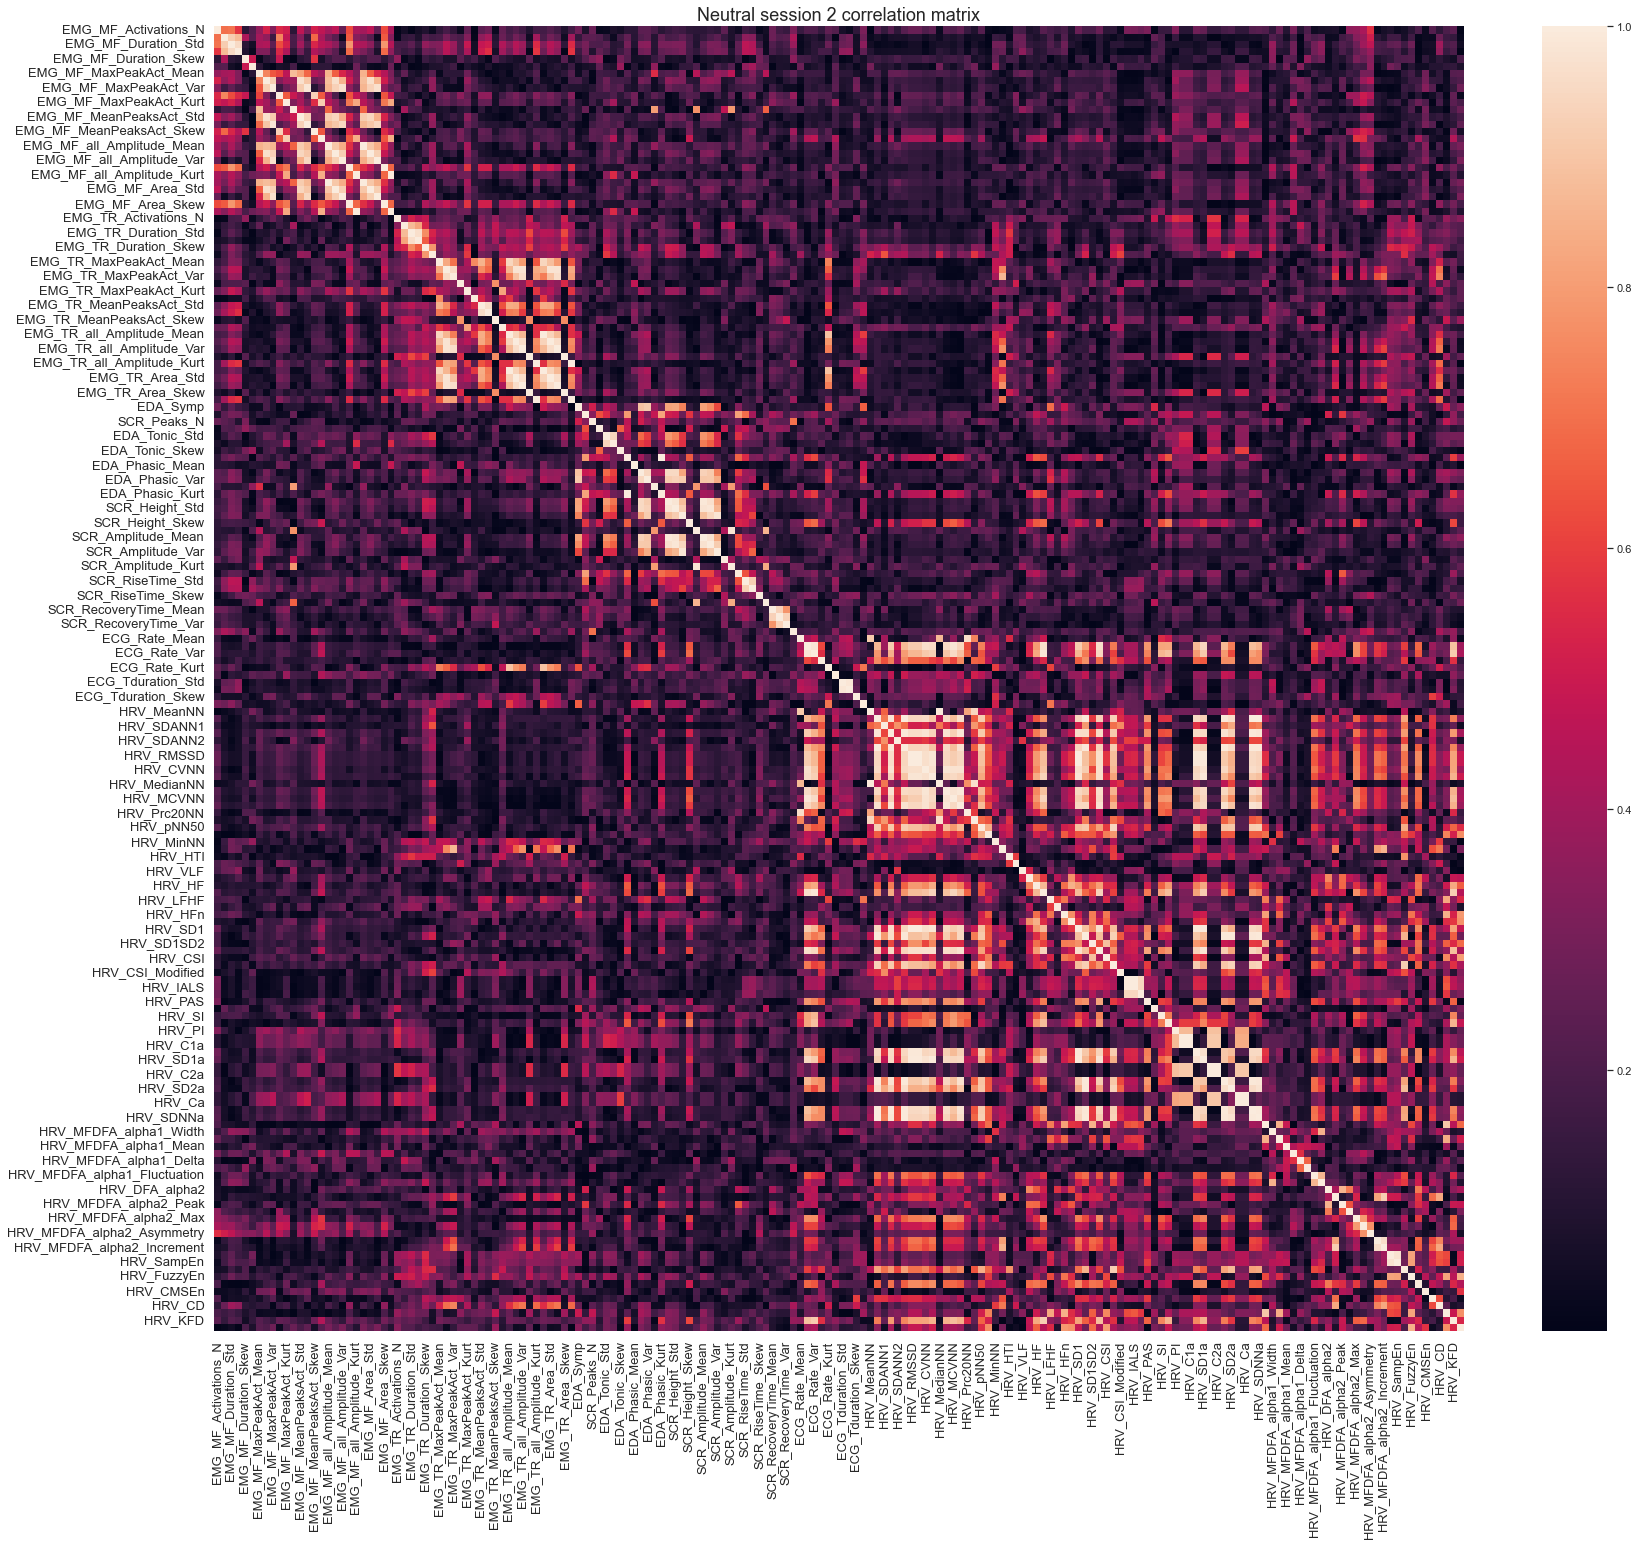

In [11]:
# Tenho de fazer uma análise de remoção de NaN das features da baseline de cada sessão: 
#print(neutral_S1.isnull().values.any()) # Verifica se existe algum valor nulo. True -> Existe.
#print('\n',neutral_S1.isnull().values.any(axis=1)) # Verifica em que linhas existem valores nulos ou não\n",
#incomplete_lines_S1 = neutral_S1[neutral_S1.isnull().values.any(axis=1)]
#print('\n',neutral_S1[neutral_S1.isnull().values.any(axis=1)]) # Fornece as linhas que contêm NaN values\n",
#print('\n',incomplete_lines_S1.shape) #(29, 184) # Todas as linhas têm NaN porque há colunas que tem todos os falores NaN\n",
#print('\n',neutral_S1.isnull().values.any(axis=0)) # Verifica em que colunas existem valores nulos ou não\n",
#print('\n', neutral_S1.columns[neutral_S1.isna().any()].tolist()) # Fornece uma lista com as colunas que têm NaN values\n",
# Colunas que têm valores NaN:  ['HRV_SDANN5', 'HRV_SDNNI5', 'HRV_ULF'],
#print(neutral_S1[ ['HRV_SDANN5', 'HRV_SDNNI5', 'HRV_ULF']]),
#print('\n',neutral_S1['HRV_SDANN5'].value_counts().sum()) #0
#print('\n',neutral_S1['HRV_SDNNI5'].value_counts().sum()) #0#
#print('\n',neutral_S1['HRV_ULF'].value_counts().sum()) #0

#print(neutral_S2.isnull().values.any()) # Verifica se existe algum valor nulo. True -> Existe.
#print('\n',neutral_S2.isnull().values.any(axis=1)) # Verifica em que linhas existem valores nulos ou não\n",
#incomplete_lines_S2 = neutral_S2[neutral_S2.isnull().values.any(axis=1)]
#print('\n',neutral_S2[neutral_S2.isnull().values.any(axis=1)]) # Fornece as linhas que contêm NaN values\n",
#print('\n',incomplete_lines_S2.shape) #(29, 184) # Todas as linhas têm NaN porque há colunas que tem todos os falores NaN\n",
#print('\n',neutral_S2.isnull().values.any(axis=0)) # Verifica em que colunas existem valores nulos ou não\n",
#print('\n', neutral_S2.columns[neutral_S2.isna().any()].tolist()) # Fornece uma lista com as colunas que têm NaN values\n",
# Colunas que têm valores NaN:   ['SCR_RecoveryTime_Skew', 'HRV_ULF'],
#print(neutral_S2[  ['SCR_RecoveryTime_Skew', 'HRV_SDANN5', 'HRV_SDNNI5', 'HRV_ULF']]),
#print('\n',neutral_S2['HRV_ULF'].value_counts().sum()) #0

# Dado os valores NaN obtidos nas ditas colunas a melhor forma é remover estas features:,

#neutral_S1 = neutral_S1.drop( ['HRV_SDANN5', 'HRV_SDNNI5', 'HRV_ULF'],axis=1)
#print(neutral_S1.shape) 
neutral_S2 = neutral_S2.drop( ['SCR_RecoveryTime_Skew','HRV_SDANN5','HRV_SDNNI5', 'HRV_ULF'],axis=1)
print(neutral_S2.shape) 

cor_b_S1 = abs(neutral_S1.corr())
cor_b_S2 = abs(neutral_S2.corr())

sns.set(rc={'figure.figsize':(28,24)})
b_S1=sns.heatmap(cor_b_S1)
b_S1.set_title('Neutral session 1 correlation matrix',fontsize=18)
b_S1.tick_params(labelsize=13)
plt.show()

sns.set(rc={'figure.figsize':(28,24)})
b_S2=sns.heatmap(cor_b_S2)
b_S2.set_title('Neutral session 2 correlation matrix',fontsize=18)
b_S2.tick_params(labelsize=13)
plt.show()

In [12]:
cor_b_S1.values
corr_mean_S1 = np.mean(cor_b_S1, axis=0)
print(corr_mean_S1)

cor_b_S2.values
corr_mean_S2 = np.mean(cor_b_S2, axis=0)
print(corr_mean_S2)

EMG_MF_Activations_N    0.178626
EMG_MF_Duration_Mean    0.234589
EMG_MF_Duration_Std     0.256507
EMG_MF_Duration_Var     0.227202
EMG_MF_Duration_Skew    0.171981
                          ...   
HRV_RCMSEn              0.286898
HRV_CD                  0.215742
HRV_HFD                 0.298423
HRV_KFD                 0.253825
HRV_LZC                 0.258732
Length: 181, dtype: float64
EMG_MF_Activations_N    0.199483
EMG_MF_Duration_Mean    0.183707
EMG_MF_Duration_Std     0.226405
EMG_MF_Duration_Var     0.203856
EMG_MF_Duration_Skew    0.139757
                          ...   
HRV_RCMSEn              0.247774
HRV_CD                  0.248635
HRV_HFD                 0.262686
HRV_KFD                 0.343629
HRV_LZC                 0.259652
Length: 180, dtype: float64


EMG_MF_Activations_N    EMG_MF_Duration_Mean
EMG_MF_Duration_Mean     EMG_MF_Duration_Std
EMG_MF_Duration_Std      EMG_MF_Duration_Var
EMG_MF_Duration_Var      EMG_MF_Duration_Std
EMG_MF_Duration_Skew    EMG_MF_Duration_Kurt
                                ...         
HRV_RCMSEn                         HRV_RMSSD
HRV_CD                               HRV_VHF
HRV_HFD                             HRV_LFHF
HRV_KFD                         ECG_Rate_Var
HRV_LZC                             HRV_LnHF
Length: 181, dtype: object

 EMG_MF_Duration_Std

 0.6878125049306082


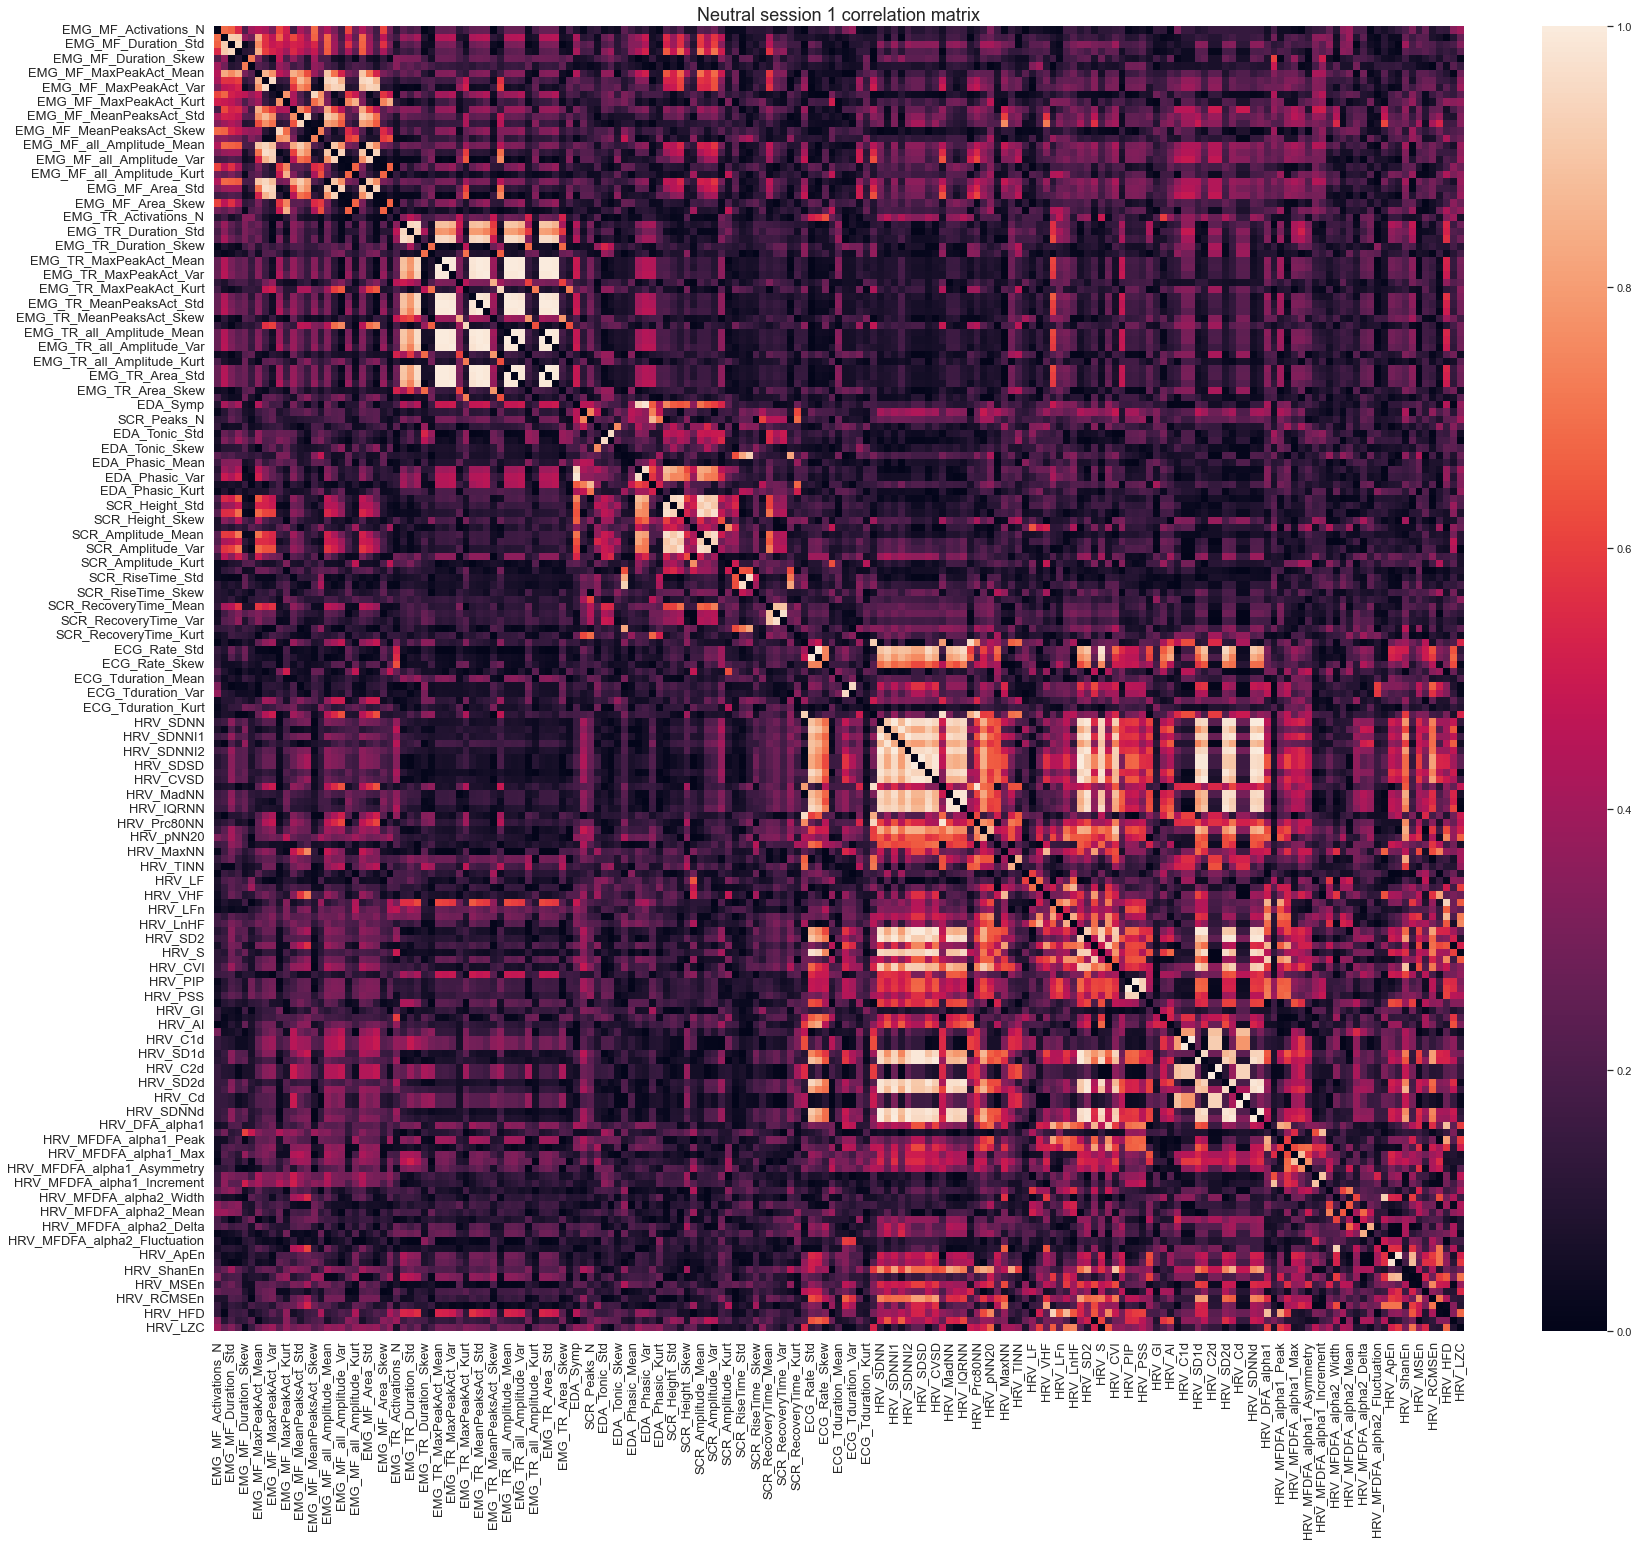

EMG_MF_Activations_N         EMG_MF_Duration_Std
EMG_MF_Duration_Mean         EMG_MF_Duration_Std
EMG_MF_Duration_Std          EMG_MF_Duration_Var
EMG_MF_Duration_Var          EMG_MF_Duration_Std
EMG_MF_Duration_Skew    EMG_MF_MeanPeaksAct_Skew
                                  ...           
HRV_RCMSEn                HRV_MFDFA_alpha2_Width
HRV_CD                    HRV_MFDFA_alpha2_Width
HRV_HFD                           HRV_DFA_alpha1
HRV_KFD                                  HRV_VHF
HRV_LZC                              HRV_FuzzyEn
Length: 180, dtype: object

 EMG_MF_Duration_Std

 0.6989471699377856


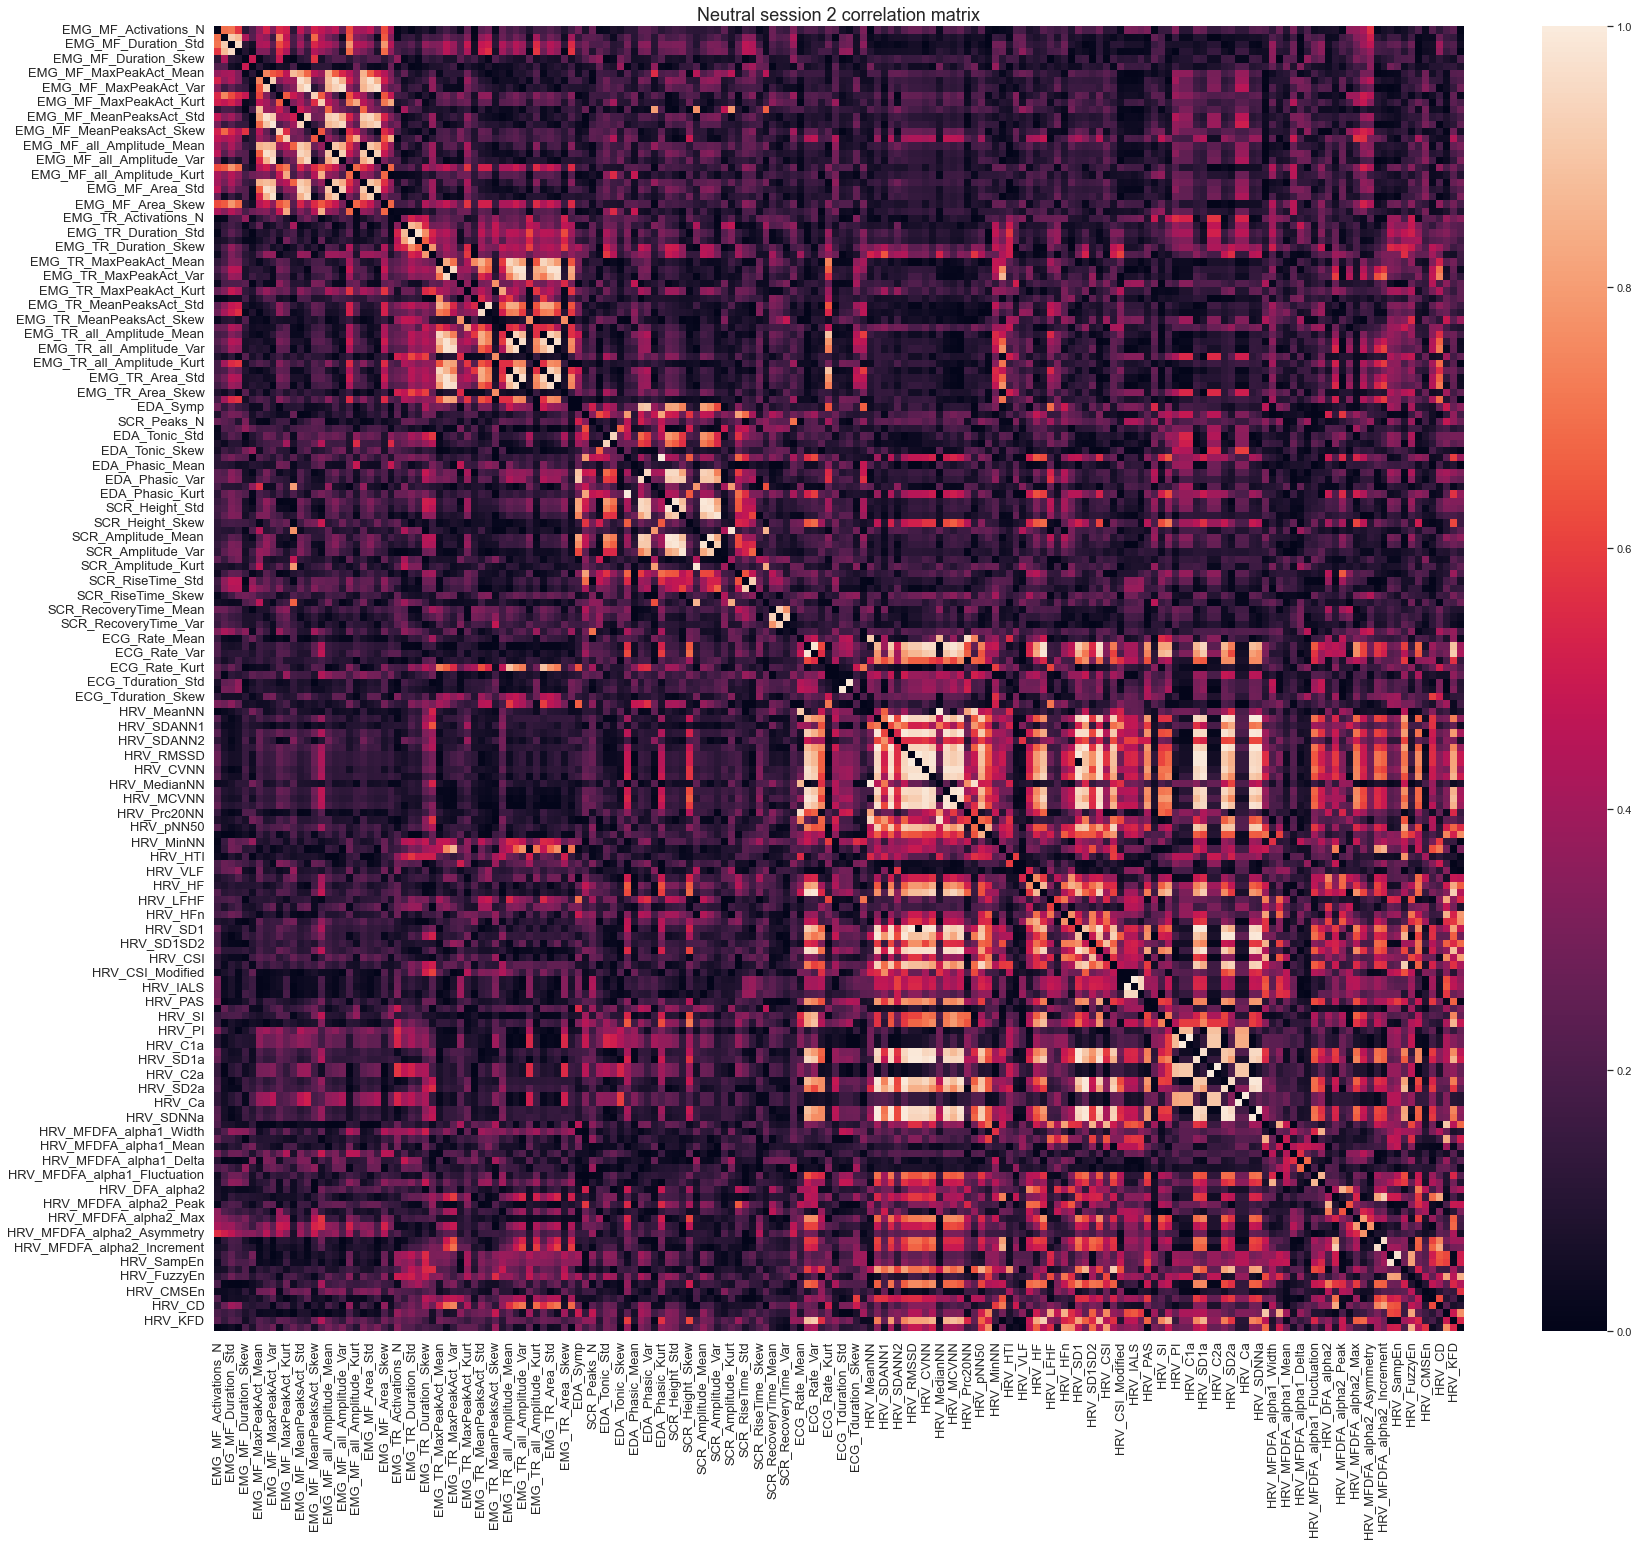

In [13]:
new_cor_b_S1 = cor_b_S1.replace(1,0)
a = new_cor_b_S1.idxmax()
print(a)
print('\n',a[1])
#print(new_cor_b_S1)
print('\n',new_cor_b_S1.iloc[1]['EMG_MF_Activations_N'])

sns.set(rc={'figure.figsize':(28,24)})
b_S1=sns.heatmap(new_cor_b_S1)
b_S1.set_title('Neutral session 1 correlation matrix',fontsize=18)
b_S1.tick_params(labelsize=13)
plt.show()


new_cor_b_S2 = cor_b_S2.replace(1,0)
a_S2 = new_cor_b_S2.idxmax()
print(a_S2)
print('\n',a_S2[1])
#print(new_cor_b_S1)
print('\n',new_cor_b_S2.iloc[1]['EMG_MF_Activations_N'])

sns.set(rc={'figure.figsize':(28,24)})
b_S2=sns.heatmap(new_cor_b_S2)
b_S2.set_title('Neutral session 2 correlation matrix',fontsize=18)
b_S2.tick_params(labelsize=13)
plt.show()

In [14]:
def selecting_feat (data,new_cor,a,threshold):
    deleted_features_list = []
    
        # Between all combinations find the maximum value and save the feature of row and the feature of column
    corr_value=0
    for i in range(0,len(a)):
        correlation = new_cor.iloc[i][a[i]]
        #print(correlation)
        #if corr_value<correlation:
           # corr_value=correlation
           # print(corr_value)
        if correlation >= threshold:
            feat1=new_cor.columns[i] #row of dataframe
            feat2=a[i] #column
                #Para teste fiz o print de feat1 e feat2 para depois ver a média de correlaçoes de cada uma e confirmar que está correto o funcionamento da função
            #print(feat1) 
            #print(feat2)
                 # Acessing the excel with the p-values of ANOVA results and delete the feature with the biggest p-value
            if corr_mean_S1[feat1]>=corr_mean_S1[feat2]:
                deleted_feat=feat1
            else:
                deleted_feat=feat2
            if deleted_feat not in deleted_features_list:
                deleted_features_list.append(deleted_feat)
                
    
        # Calculate new correlation matrix
        #cor = abs(data.corr())
        #new_cor = cor.replace(1,0)
        #a = new_cor.idxmax()
    # Delete the column and row of the removed feature 
    for feat in deleted_features_list:
        print(feat)
        data = data.drop(columns=feat)   

    n_del=len(deleted_features_list)
    n_rem=len(new_cor.columns)
    return n_del, n_rem, data, deleted_features_list

n_del, n_rem, data, deleted_features_list = selecting_feat (neutral_S1,new_cor_b_S1,a,0.50)

n_del_S2, n_rem_S2, data_S2, deleted_features_list_S2 = selecting_feat (neutral_S2,new_cor_b_S2,a_S2,0.50)

EMG_MF_Duration_Mean
EMG_MF_Duration_Std
EMG_MF_Duration_Skew
EMG_MF_all_Amplitude_Mean
EMG_MF_all_Amplitude_Std
EMG_MF_MaxPeakAct_Std
EMG_MF_MaxPeakAct_Skew
EMG_MF_MaxPeakAct_Kurt
EMG_MF_MeanPeaksAct_Mean
EMG_MF_MeanPeaksAct_Std
EMG_MF_Area_Std
EMG_MF_Area_Mean
ECG_Rate_Skew
EMG_TR_Duration_Var
EMG_TR_Duration_Mean
EMG_TR_Duration_Skew
EMG_TR_MaxPeakAct_Kurt
EMG_TR_MeanPeaksAct_Std
EMG_TR_MaxPeakAct_Std
EMG_TR_MaxPeakAct_Var
EMG_TR_MeanPeaksAct_Skew
EMG_TR_MeanPeaksAct_Kurt
EMG_TR_all_Amplitude_Mean
EMG_TR_all_Amplitude_Std
EMG_TR_all_Amplitude_Var
EMG_TR_Area_Std
EMG_TR_Area_Var
EDA_Symp
EDA_SympN
SCR_Peaks_N
EDA_Tonic_Mean
EDA_Tonic_Std
EDA_Tonic_Kurt
EDA_Phasic_Var
SCR_Height_Mean
SCR_Amplitude_Std
SCR_Amplitude_Mean
SCR_Height_Kurt
SCR_Amplitude_Var
SCR_Amplitude_Skew
SCR_RiseTime_Mean
SCR_RiseTime_Var
SCR_RecoveryTime_Mean
SCR_RecoveryTime_Std
SCR_RecoveryTime_Skew
HRV_Prc20NN
ECG_Rate_Std
HRV_SDANN1
SCR_Amplitude_Kurt
ECG_Tduration_Std
HRV_Prc80NN
HRV_MedianNN
HRV_SDNNa
HRV_SDAN

In [15]:
print(n_del)
print(deleted_features_list)
print(len(a))

print(n_del_S2)
print(deleted_features_list_S2)
print(len(a_S2))

102
['EMG_MF_Duration_Mean', 'EMG_MF_Duration_Std', 'EMG_MF_Duration_Skew', 'EMG_MF_all_Amplitude_Mean', 'EMG_MF_all_Amplitude_Std', 'EMG_MF_MaxPeakAct_Std', 'EMG_MF_MaxPeakAct_Skew', 'EMG_MF_MaxPeakAct_Kurt', 'EMG_MF_MeanPeaksAct_Mean', 'EMG_MF_MeanPeaksAct_Std', 'EMG_MF_Area_Std', 'EMG_MF_Area_Mean', 'ECG_Rate_Skew', 'EMG_TR_Duration_Var', 'EMG_TR_Duration_Mean', 'EMG_TR_Duration_Skew', 'EMG_TR_MaxPeakAct_Kurt', 'EMG_TR_MeanPeaksAct_Std', 'EMG_TR_MaxPeakAct_Std', 'EMG_TR_MaxPeakAct_Var', 'EMG_TR_MeanPeaksAct_Skew', 'EMG_TR_MeanPeaksAct_Kurt', 'EMG_TR_all_Amplitude_Mean', 'EMG_TR_all_Amplitude_Std', 'EMG_TR_all_Amplitude_Var', 'EMG_TR_Area_Std', 'EMG_TR_Area_Var', 'EDA_Symp', 'EDA_SympN', 'SCR_Peaks_N', 'EDA_Tonic_Mean', 'EDA_Tonic_Std', 'EDA_Tonic_Kurt', 'EDA_Phasic_Var', 'SCR_Height_Mean', 'SCR_Amplitude_Std', 'SCR_Amplitude_Mean', 'SCR_Height_Kurt', 'SCR_Amplitude_Var', 'SCR_Amplitude_Skew', 'SCR_RiseTime_Mean', 'SCR_RiseTime_Var', 'SCR_RecoveryTime_Mean', 'SCR_RecoveryTime_Std', '

In [16]:
data.shape
print(data)
filepath_feat='Neutral_features_S1.xlsx'
writer=pd.ExcelWriter(filepath_feat, engine='xlsxwriter')
data.to_excel(writer, sheet_name='Neutral_S1', na_rep='nan')
writer.save()

data_S2.shape
print(data_S2)
filepath_feat='Neutral_features_S2.xlsx'
writer=pd.ExcelWriter(filepath_feat, engine='xlsxwriter')
data_S2.to_excel(writer, sheet_name='Neutral_S2', na_rep='nan')
writer.save()

    EMG_MF_Activations_N  EMG_MF_Duration_Var  EMG_MF_Duration_Kurt  \
0                    426             0.024437             68.686478   
1                    472             0.008538             24.579094   
2                    434             0.016776            246.214836   
3                    463             0.003767            172.887975   
4                    508             0.011311             71.364168   
5                    285             0.037481             38.722320   
6                    549             0.003666             36.997273   
7                    132             1.002599             39.333372   
8                    159             0.376257             24.119836   
9                    330             0.018246            129.320968   
10                   653             0.009108            249.312747   
11                   485             0.068594            351.372809   
12                   461             0.012464             39.348244   
13    